# Linear Regression

## sklearn 라이브러리의 LinearRegression API 
* LinearRegression API의 Method (함수)
> * fit(X, y) : 학습 데이터를 이용하여 모델의 회귀 계수(w)와 편향(b)을 학습
> * predict(X) : 모델에 테스트 데이터를 입력하여 계산된 예측값 반환
> * score(X, y) : 모델에 테스트 데이터를 입력하여 모델의 성능 지표 반환

* LinearRegression API의 Attribute(속성)
> * coef_: fit() 메서드를 통해 학습된 모델의 회귀계수(W)
> * intercept_: Bias 값(b)

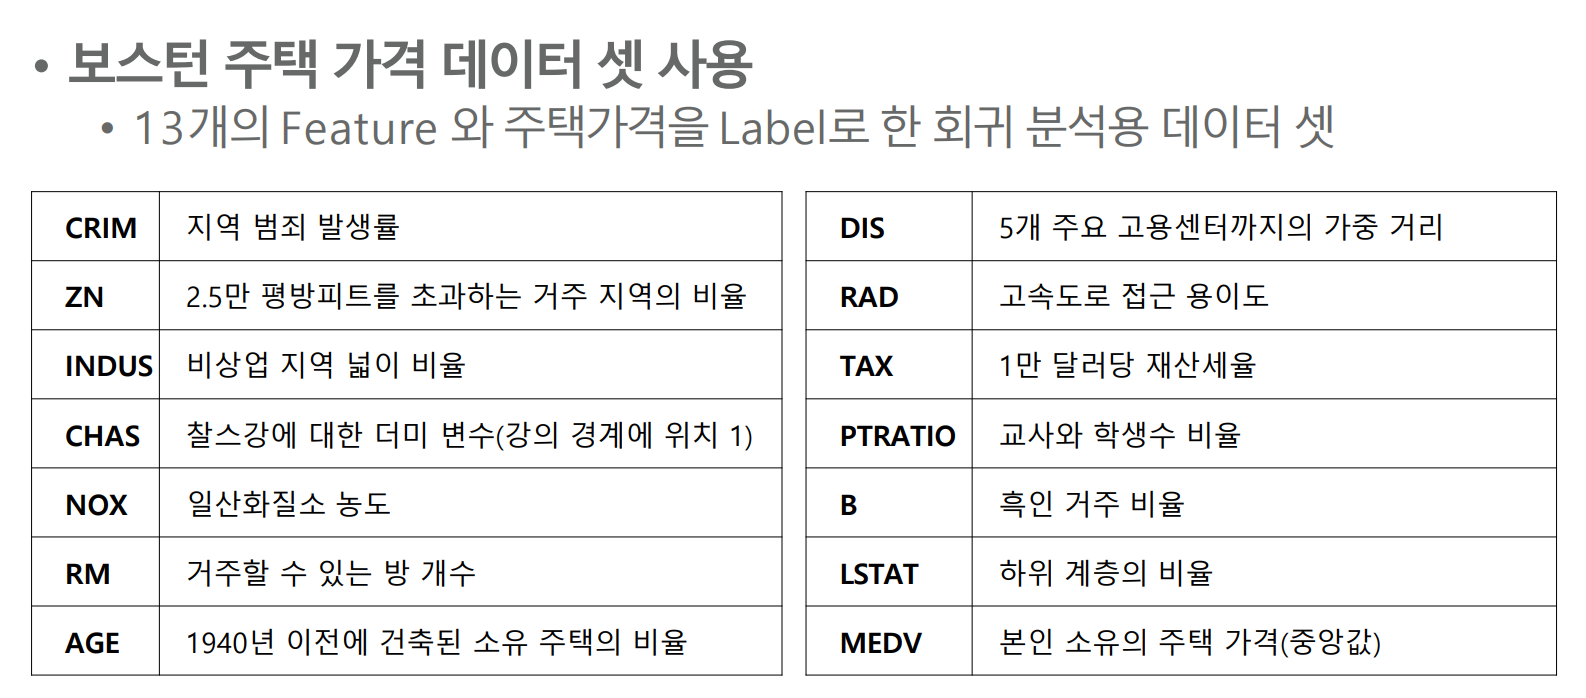

## 보스턴 주택 가격 예측 모델 구현

In [1]:
# 보스턴 주택 가격 데이터셋 load
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)

df_boston["PRICE"] = boston.target

print('Boston Dataset Size:', df_boston.size)
df_boston.head() 

Boston Dataset Size: 7084


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# 훈련/ 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_target = df_boston["PRICE"]
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

In [3]:
# LinearRegression API를 이용한 모델 생성 및 학습
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

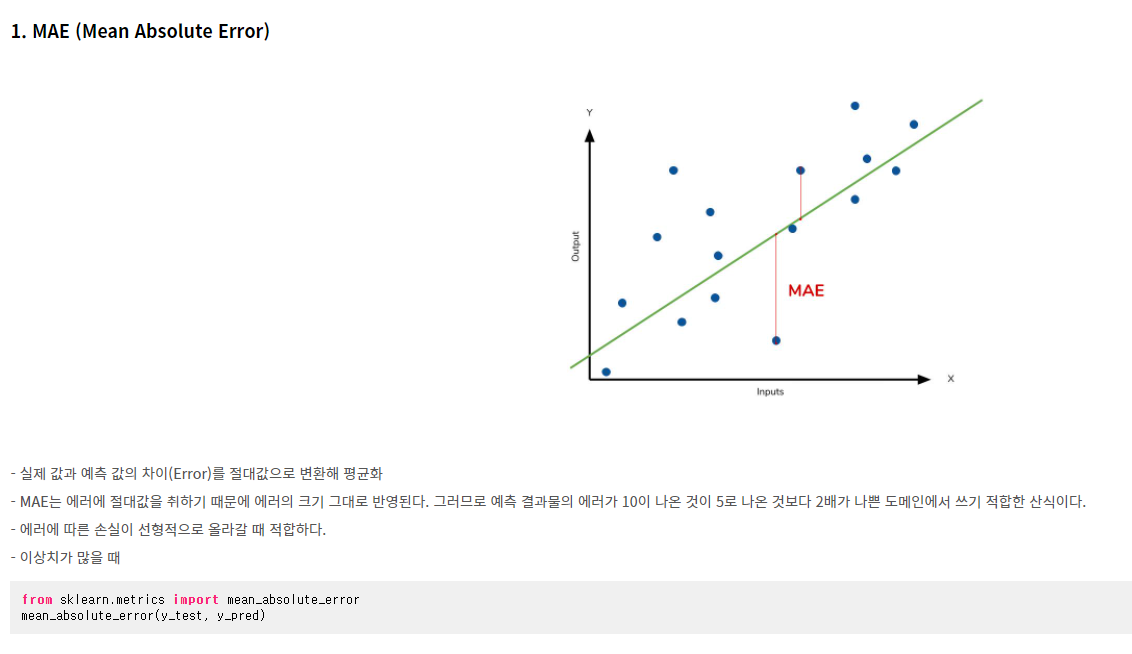

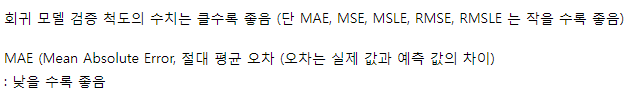

* 잔차값(예측값과 실제값 간의 차이)을 절대값 취하고 평균을 낸 방법
* 즉, MAE는 모델이 예측을 얼마나 틀렸는가를 의미한다.

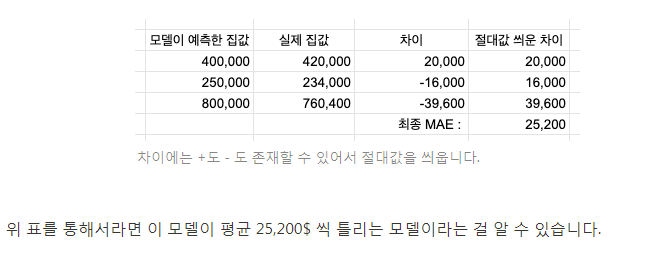

In [4]:
# 학습된 모델에 테스트 데이터(x_test) 입력하여 예측 값 생성
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(x_test)

In [11]:
# 예측 값(y_pred)과 테스트 데이터의 정답(y_test)을 이용하여 성능 측정
# 해당 모델은 평균 3.214씩 틀리는 모델이라는 걸 알 수 있음 

mae = mean_absolute_error(y_test, y_pred)

print('MAE: {0:.3f}'.format(mae), '\n')
print(y_test, y_pred, sep ='\n')

MAE: 3.214 

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
       ... 
393    13.8
325    24.6
53     23.4
401     7.2
178    29.9
Name: PRICE, Length: 152, dtype: float64
[23.15424087 19.65590246 36.42005168 19.96705124 32.40150641 17.66341192
 30.32844101 17.8513932  10.86187069 12.83177966 21.18350434 16.41212257
 28.66817527 37.01110952 23.42172197 24.56906089 14.55434775 11.51023436
 30.27784089 23.48027467 22.86210577 17.61623753 21.2528808  17.29802868
 34.06118291  7.19879841 13.39928425 19.4234468  13.2423286   8.3336837
 29.34933073 11.83768837 19.84125562 23.97623235 16.34351261 13.20973749
 14.3352014  17.26323753 17.37091562 23.84644351 32.8390912   9.3866759
 19.06694335 -3.98840206 19.87721947 21.26003361 24.17775745 35.35923599
 20.32415303 28.23212889 32.67560962 40.83910565 41.19126206 19.78588457
 25.0134137  24.13111046 19.62715719 33.49344219 23.61402811 15.31513017
 22.70657074 25.78436589 23.99723589  8.78013424 21.81929237 39.68193998
 32.8907251  

In [6]:
# 학습된 모델의 성능 측정 및 회귀 계수 확인
import numpy as np

bias = np.round(lr.intercept_, 11)
weight = np.round(lr.coef_, 1)

print("Bias:", bias)
print("Weight:", weight)

Bias: 40.99559517216
Weight: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [8]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [12]:
# 학습된 모델의 회귀 계수 확인
# 회귀계수를 구하는 이유는 독립변수의 변화가 종속변수를 얼마나 변화시키는지 알기 위해서
# 회귀계수를 통해 설명 가능!
# RM 방의 개수가 1 늘어나면 집값이 3.4 늘어났다

coeff = pd.Series(data=weight, index=x_data.columns)
coeff.sort_values(ascending = False)

## y = w1 x1 + w2 x2 + ....+ w13 x13 + b 


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

## 다중공선성 등 추가 학습

https://ysyblog.tistory.com/122
https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html
https://mindscale.kr/course/basic-stat-python/13/



# Logistic Regression

## LogisticRegression을 구현할 수 있는 API
* LogisticRegression() API의 Method (함수)
> * fit(X, y) : 학습 데이터를 이용하여 모델의 회귀계수(w)와 편향(b)을 학습
> * predict(X) : 모델에 테스트 데이터를 입력하여 계산된 예측값(y) 반환
> * score(X, y) : 모델에 테스트 데이터를 입력하여 모델의 성능(정확도) 반환

* Attribute(속성)
> * coef_: fit() 메서드를 통해 학습된 모델의 회귀계수(W)
> * intercept_: Bias 값(b)

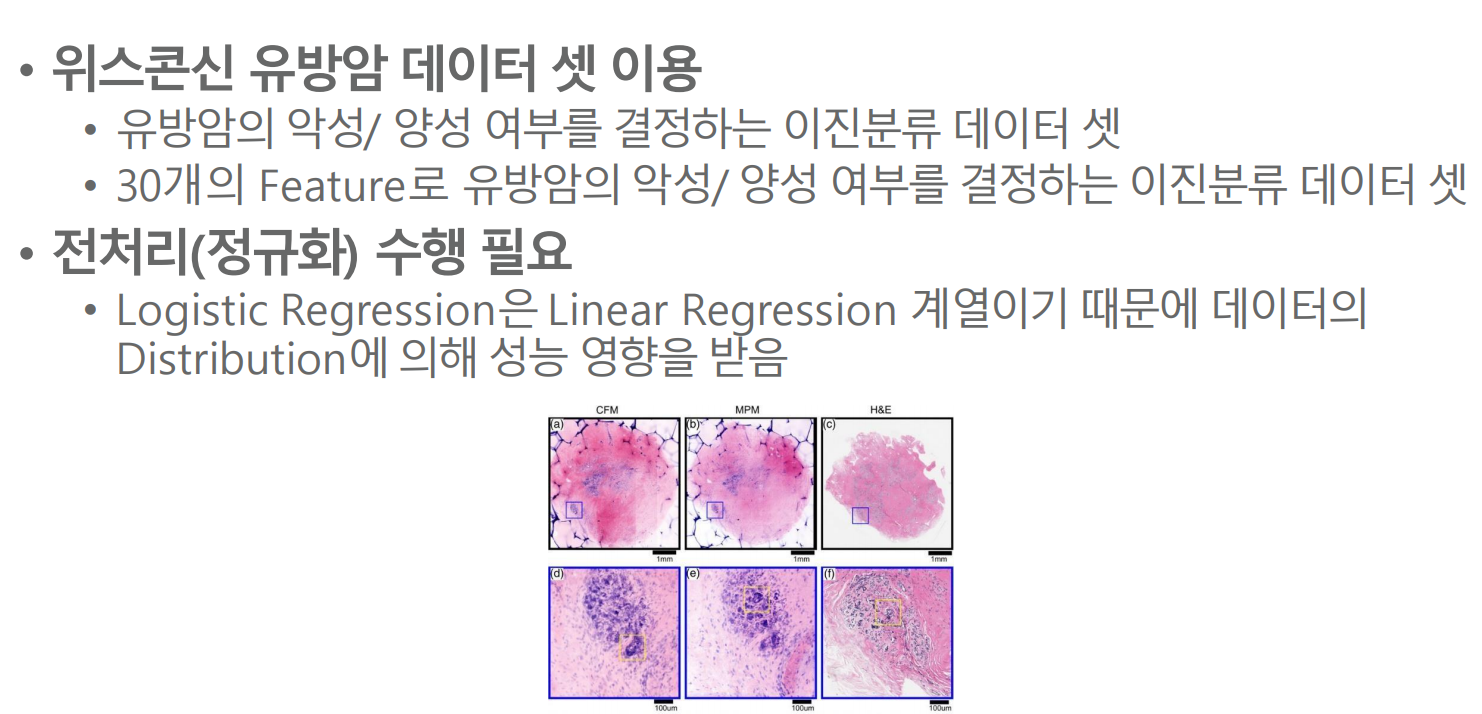

In [1]:
# 위스콘신 유방암 데이터셋 load 및 표준화

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
scaler = StandardScaler()

# 표준화 수행 하여 데이터 변경
data_scaled = scaler.fit_transform(cancer.data)

# 학습데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state=11)

In [2]:
# LogisticRegression() API 사용한 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [3]:
# 학습된 모델에 테스트 데이터(x_test) 입력하여 예측값 생성
lr_preds = lr_clf.predict(x_test)

In [4]:
# 예측값(y_pred)과 테스트 데이터의 정답(y_test)을 이용하여 성능 측정
print("Accuracy {:0.3f}".format(accuracy_score(y_test, lr_preds)))

Accuracy 0.953


In [5]:
# 학습된 모델의 회귀계수 확인
import numpy as np
import pandas as pd

bias = np.round(lr_clf.intercept_, 11)
weight = np.round(lr_clf.coef_[0], 2)

print(bias, weight)

[0.61424235] [-0.57 -0.78 -0.56 -0.59  0.08  0.26 -0.73 -0.84 -0.43  0.61 -1.01  0.72
 -0.79 -0.77 -0.38  0.62  0.07 -0.23  0.61  0.53 -0.94 -1.46 -0.86 -0.86
 -0.62 -0.16 -0.62 -0.8  -0.75 -0.64]


In [9]:
print(lr_clf.coef_, lr_clf.coef_[0], sep='\n\n')

[[-0.56729264 -0.780448   -0.55957757 -0.58806669  0.07588117  0.25972497
  -0.72740761 -0.83832014 -0.43130915  0.61215208 -1.00673745  0.72157101
  -0.7855837  -0.77294691 -0.38343267  0.61659222  0.06693057 -0.23306423
   0.60602518  0.52874677 -0.93975057 -1.46033683 -0.85501172 -0.85642579
  -0.61983855 -0.16099505 -0.61548777 -0.80394433 -0.75349917 -0.63811324]]

[-0.56729264 -0.780448   -0.55957757 -0.58806669  0.07588117  0.25972497
 -0.72740761 -0.83832014 -0.43130915  0.61215208 -1.00673745  0.72157101
 -0.7855837  -0.77294691 -0.38343267  0.61659222  0.06693057 -0.23306423
  0.60602518  0.52874677 -0.93975057 -1.46033683 -0.85501172 -0.85642579
 -0.61983855 -0.16099505 -0.61548777 -0.80394433 -0.75349917 -0.63811324]


In [49]:
# 학습된 모델의 회귀계수 확인

coeff = pd.Series(data=weight, index= cancer.feature_names[:30])
coeff.sort_values(ascending = False)



texture error              0.72
compactness error          0.62
mean fractal dimension     0.61
symmetry error             0.61
fractal dimension error    0.53
mean compactness           0.26
mean smoothness            0.08
concavity error            0.07
worst compactness         -0.16
concave points error      -0.23
smoothness error          -0.38
mean symmetry             -0.43
mean perimeter            -0.56
mean radius               -0.57
mean area                 -0.59
worst smoothness          -0.62
worst concavity           -0.62
worst fractal dimension   -0.64
mean concavity            -0.73
worst symmetry            -0.75
area error                -0.77
mean texture              -0.78
perimeter error           -0.79
worst concave points      -0.80
mean concave points       -0.84
worst perimeter           -0.86
worst area                -0.86
worst radius              -0.94
radius error              -1.01
worst texture             -1.46
dtype: float64